### Getting all the tools ready

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1: Load the Full Data

I’ll load the entire dataset to fully assess its structure and identify all the potentially relevant features through an initial analysis.

In [29]:
# Load the datasets using pandas
accepted_loans = pd.read_csv('/content/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')
rejected_loans = pd.read_csv('/content/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv')

# Display the first few rows of each dataset to understand their structure
accepted_loans_head = accepted_loans.head()
rejected_loans_head = rejected_loans.head()

accepted_loans_head, rejected_loans_head


<ipython-input-29-d8eeec71a140>:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_loans = pd.read_csv('/content/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')


(         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
 1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
 2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
 3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
 4  68476807        NaN    10400.0      10400.0          10400.0   60 months   
 
    int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
 0     13.99       123.03     C        C4  ...                            NaN   
 1     11.99       820.28     C        C1  ...                            NaN   
 2     10.78       432.66     B        B4  ...                            NaN   
 3     14.85       829.90     C        C5  ...                            NaN   
 4     22.45       289.91     F        F1  ...                            NaN   
 
   hardship_last_payment_amoun

In [30]:
accepted_loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rejected_loans_head

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0



**Accepted Dataset**

*   The dataset contains detailed information such as loan amount (loan_amnt), term (term), interest rate (int_rate), grade (grade), employment details, and many other financial indicators.

*   There are many attributes, some of which may not be necessary for our model. We'll need to decide which features are relevant.

**Rejected Dataset**

*   This dataset is less detailed, featuring attributes like the amount requested (Amount Requested), application date (Application Date), loan title (Loan Title), risk score (Risk_Score), and debt-to-income ratio (Debt-To-Income Ratio).

*   The dataset is primarily focused on the basic data provided at the time of the loan application rejection.





We will move ahead with accepted loans dataset only. Focusing on the "accepted" dataset for developing the predictive model is strategic because it contains detailed historical data on loans that were granted, including the crucial outcomes needed for supervised learning, such as whether the loan was repaid or defaulted. This dataset offers comprehensive information for training a robust model, with features ranging from loan amounts and interest rates to borrower’s credit details. In contrast, the "rejected" dataset, while useful for understanding rejection factors, lacks outcomes on loan performance, making it less directly applicable for predicting defaults.

### Next Steps for Data Preprocessing:
- Remove irrelevant features: For example, in the accepted loans dataset, fields like id, member_id (which is all NaNs), and other non-informative features can be dropped.
- Handle missing values: Analyze the percentage of missing data in each column and decide whether to impute or drop them based on their relevance and the amount of missing data.

In [32]:
# Identifying columns with high percentage of missing values in 'accepted' dataset
missing_data_threshold = 0.5  # Threshold for dropping columns, 50% missing values
high_missing_data_columns = accepted_loans.columns[accepted_loans.isnull().mean() > missing_data_threshold]

# Drop these columns from the dataset
accepted_loans_cleaned = accepted_loans.drop(columns=high_missing_data_columns)

# Check the first few rows and the new shape of the dataset after dropping high-missing-value columns
accepted_loans_cleaned_head = accepted_loans_cleaned.head()
new_shape = accepted_loans_cleaned.shape

accepted_loans_cleaned_head, new_shape


(         id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
 0  68407277     3600.0       3600.0           3600.0   36 months     13.99   
 1  68355089    24700.0      24700.0          24700.0   36 months     11.99   
 2  68341763    20000.0      20000.0          20000.0   60 months     10.78   
 3  66310712    35000.0      35000.0          35000.0   60 months     14.85   
 4  68476807    10400.0      10400.0          10400.0   60 months     22.45   
 
    installment grade sub_grade                    emp_title  ...  \
 0       123.03     C        C4                      leadman  ...   
 1       820.28     C        C1                     Engineer  ...   
 2       432.66     B        B4                 truck driver  ...   
 3       829.90     C        C5  Information Systems Officer  ...   
 4       289.91     F        F1          Contract Specialist  ...   
 
   percent_bc_gt_75 pub_rec_bankruptcies  tax_liens tot_hi_cred_lim  \
 0              0.0                  

Some columns might still be irrelevant for our predictive model (like id, disbursement_method), which we should consider dropping.

In [33]:
# Further refine the dataset by removing explicitly irrelevant columns
irrelevant_columns = ['id', 'disbursement_method']  # Example of some irrelevant columns
accepted_loans_cleaned = accepted_loans_cleaned.drop(columns=irrelevant_columns)

# Handle missing values for columns with less than 20% missing data
for column in accepted_loans_cleaned.columns:
    if accepted_loans_cleaned[column].isnull().mean() > 0 and accepted_loans_cleaned[column].isnull().mean() <= 0.2:
        # Fill numeric columns with the median
        if accepted_loans_cleaned[column].dtype == 'float64' or accepted_loans_cleaned[column].dtype == 'int64':
            accepted_loans_cleaned[column] = accepted_loans_cleaned[column].fillna(accepted_loans_cleaned[column].median())
        # Fill categorical columns with the mode
        else:
            accepted_loans_cleaned[column] = accepted_loans_cleaned[column].fillna(accepted_loans_cleaned[column].mode()[0])

# Checking updated information to ensure proper cleaning
updated_info = accepted_loans_cleaned.info()

updated_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 105 entries, loan_amnt to debt_settlement_flag
dtypes: float64(83), object(22)
memory usage: 1.8+ GB


### Data Type Corrections:
Next, we need to correct any data type issues, such as converting term from a string to an integer and ensuring categorical variables are properly formatted for modeling. This involves stripping any non-numeric characters from numerical fields and applying encoding techniques to categorical fields.

In [34]:
# Convert 'term' from a string to an integer by removing 'months' and converting to int
accepted_loans_cleaned['term'] = accepted_loans_cleaned['term'].str.replace(' months', '').astype(int)

# Example of encoding a categorical variable: 'grade'
# Convert 'grade' to a categorical type and then use get_dummies for one-hot encoding
accepted_loans_cleaned['grade'] = pd.Categorical(accepted_loans_cleaned['grade'])
grade_dummies = pd.get_dummies(accepted_loans_cleaned['grade'], prefix='grade')

# Join the dummy variables with the main dataframe
accepted_loans_cleaned = pd.concat([accepted_loans_cleaned, grade_dummies], axis=1)
accepted_loans_cleaned.drop('grade', axis=1, inplace=True)  # Remove the original 'grade' column

# Show updated dataframe info to confirm changes
accepted_loans_cleaned_info = accepted_loans_cleaned.info()
accepted_loans_cleaned_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 111 entries, loan_amnt to grade_G
dtypes: bool(7), float64(83), int64(1), object(20)
memory usage: 1.8+ GB


In [35]:
accepted_loans_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,3600.0,3600.0,3600.0,36,13.99,123.03,C4,leadman,10+ years,MORTGAGE,...,13734.0,N,N,False,False,True,False,False,False,False
1,24700.0,24700.0,24700.0,36,11.99,820.28,C1,Engineer,10+ years,MORTGAGE,...,24667.0,N,N,False,False,True,False,False,False,False
2,20000.0,20000.0,20000.0,60,10.78,432.66,B4,truck driver,10+ years,MORTGAGE,...,14877.0,N,N,False,True,False,False,False,False,False
3,35000.0,35000.0,35000.0,60,14.85,829.90,C5,Information Systems Officer,10+ years,MORTGAGE,...,18000.0,N,N,False,False,True,False,False,False,False
4,10400.0,10400.0,10400.0,60,22.45,289.91,F1,Contract Specialist,3 years,MORTGAGE,...,88097.0,N,N,False,False,False,False,False,True,False


- The dataset now contains 111 columns with a mix of numerical, integer, object (likely other categorical variables), and binary (from one-hot encoding) types.

## **EDA and Futher Cleaning**
First, i'll provide a comprehensive overview of the dataset's characteristics—size, representation, attributes, and any potential biases or imbalances.

#### **Dataset Description:**
- Size: Initially, the dataset comprised over 22,000 entries with 151 attributes, which we reduced to 105 attributes after data cleaning to remove irrelevant and mostly empty columns.  
- Representation: The dataset includes a wide range of financial and personal attributes such as loan amount, term, interest rate, employment details, and credit history. These attributes offer a diverse representation of the borrowers' financial scenarios.
- Attributes: Key attributes include:   
Numerical: Loan amount, interest rate, annual income, debt-to-income ratio.   
Categorical: Home ownership, employment length, loan purpose, loan grade.   
Target Variable: Loan status (indicative of whether the loan was paid off or defaulted).   

For attribute analysis, I will describe the distribution and nature of a few critical attributes, focusing on their potential to predict loan defaults.

#### **Multivariate vs. Bivariate Analysis**
To decide whether bivariate or multivariate analysis is most suitable for the predictive model, we'll examine the complexity of relationships within the dataset.

**Bivariate Analysis:**:   

- Purpose: Can be used to identify simple relationships between individual pairs of variables, such as loan amount vs. default rate or interest rate vs. loan grade.  
- Application: Useful for initial insights and to detect obvious patterns or anomalies in specific pairs of variables.

**Multivariate Analysis:**

- Purpose: Essential for understanding the interactions between multiple variables simultaneously, which is crucial given the complexity of financial data.
- Application: Enables the construction of predictive models that consider the combined effect of various features on the loan default probability, such as the interaction between loan amount, interest rate, borrower's income, and employment stability.

**Visualization and Correlation Analysis**
To support the decision for a multivariate approach and to further describe the dataset, we'll perform a correlation analysis and visualize it using a heatmap. This will help identify which variables are most strongly related to the likelihood of loan default and thus are important to include in the predictive model.

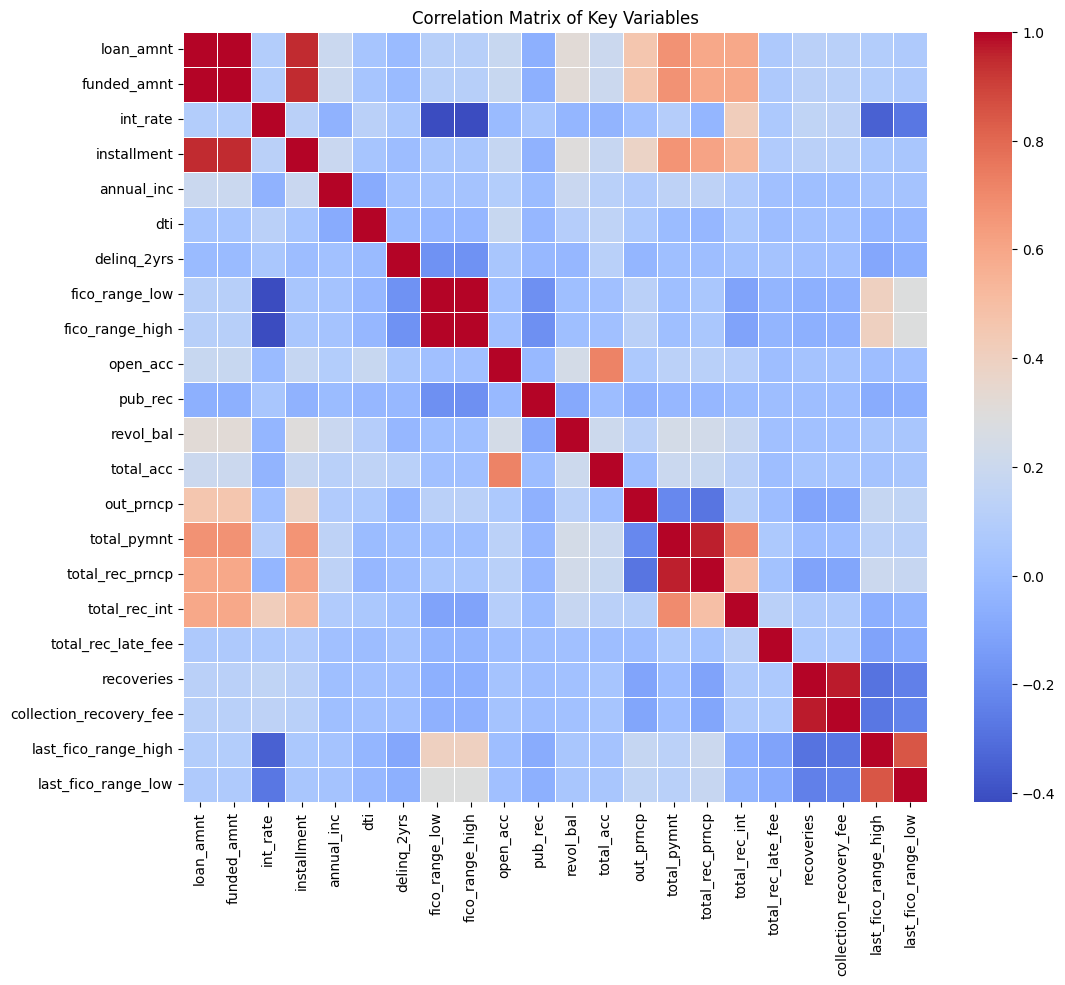

In [36]:
# Calculate correlation matrix for a subset of important numerical variables
important_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
                      'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'open_acc',
                      'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt',
                      'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                      'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low']

# Subset the dataframe
correlation_data = accepted_loans_cleaned[important_features]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()


The heatmap above displays the correlation matrix for key variables in the "accepted" loans dataset. This visualization helps to identify which variables have strong relationships with each other and might influence the likelihood of loan default. For example:

**Interest Rate and FICO Scores:** Typically, lower FICO scores correlate with higher interest rates, which could indicate a higher risk of default.  

**Loan Amount and Installment:** There's a natural correlation between the amount of the loan and the installment size, impacting the borrower's monthly financial burden.    

**Total Payment and Recovery:** High correlations between total payments made and the recovery fees suggest relationships between the amounts recovered and the effectiveness of collection efforts on defaulted loans.

Given the relationships and interactions among multiple variables, multivariate analysis is clearly more suitable for this predictive model. It allows us to understand complex behaviors that involve several predictors simultaneously, which is essential in the context of credit risk where multiple factors contribute to the likelihood of default.

### Detailed EDA

**Credit Score Analysis**
First, let's plot the distribution of borrowers' FICO scores and compare the average scores of those who default versus those who fully pay their loans. This will give us an initial sense of how creditworthiness impacts loan outcomes.

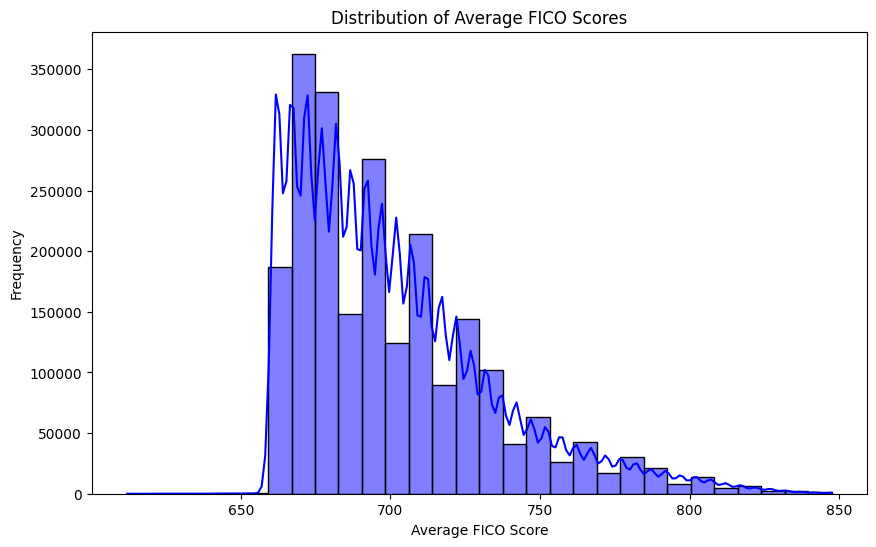

<ipython-input-37-46211fe0842e>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_loans_cleaned.loc[fully_paid_mask, 'avg_fico_score'], label='Fully Paid', shade=True)
<ipython-input-37-46211fe0842e>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_loans_cleaned.loc[default_mask, 'avg_fico_score'], label='Charged Off', shade=True)


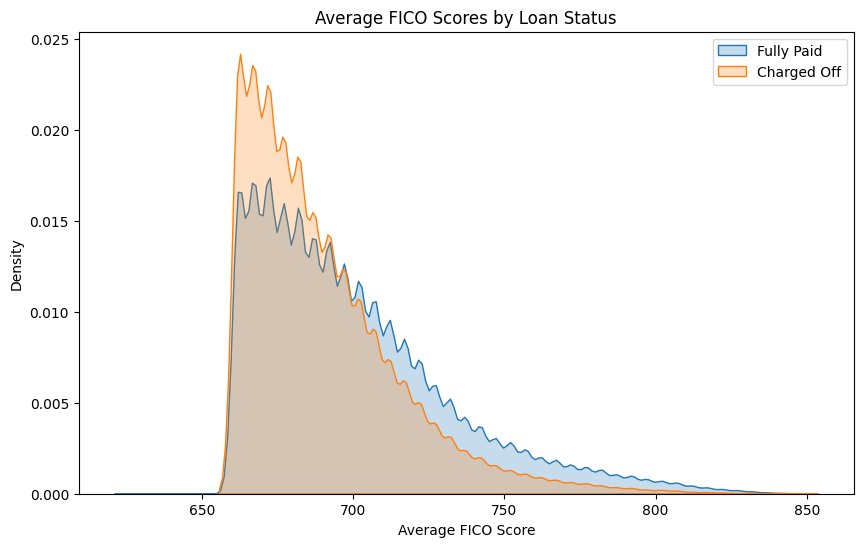

In [37]:
# Check if FICO score columns are present before plotting
if 'fico_range_low' in accepted_loans_cleaned.columns and 'fico_range_high' in accepted_loans_cleaned.columns:
    # Calculate average FICO score for each loan
    accepted_loans_cleaned['avg_fico_score'] = (accepted_loans_cleaned['fico_range_low'] + accepted_loans_cleaned['fico_range_high']) / 2

    # Plotting distribution of average FICO scores for all loans
    plt.figure(figsize=(10, 6))
    sns.histplot(accepted_loans_cleaned['avg_fico_score'], bins=30, color='blue', kde=True)
    plt.title('Distribution of Average FICO Scores')
    plt.xlabel('Average FICO Score')
    plt.ylabel('Frequency')
    plt.show()

    # Plotting FICO scores by loan status (default vs fully paid)
    default_mask = accepted_loans_cleaned['loan_status'] == 'Charged Off'
    fully_paid_mask = accepted_loans_cleaned['loan_status'] == 'Fully Paid'

    plt.figure(figsize=(10, 6))
    sns.kdeplot(accepted_loans_cleaned.loc[fully_paid_mask, 'avg_fico_score'], label='Fully Paid', shade=True)
    sns.kdeplot(accepted_loans_cleaned.loc[default_mask, 'avg_fico_score'], label='Charged Off', shade=True)
    plt.title('Average FICO Scores by Loan Status')
    plt.xlabel('Average FICO Score')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("FICO score columns are not available in the dataset.")


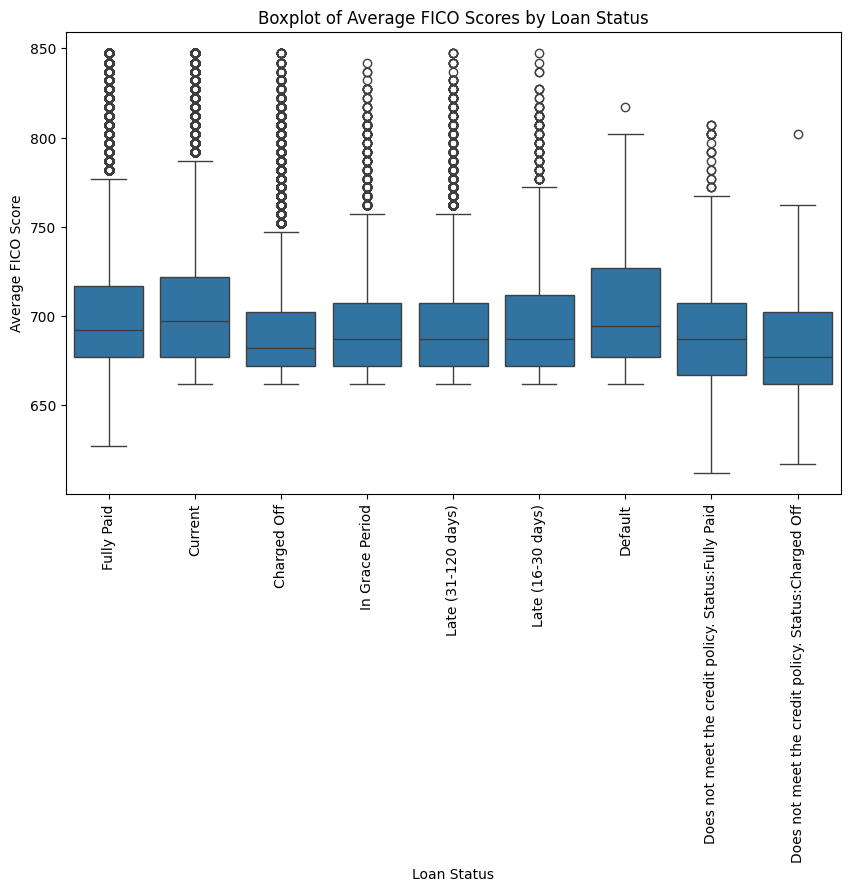

In [38]:


# Create a boxplot for 'avg_fico_score' by loan status
try:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y='avg_fico_score', data=accepted_loans_cleaned)
    plt.title('Boxplot of Average FICO Scores by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel('Average FICO Score')
    plt.xticks(rotation=90)
    plt.show()
except Exception as e:
    print(f"An error occurred during plotting: {e}")



In [39]:
# Calculate summary statistics for 'avg_fico_score' by loan status
fico_stats_by_status = accepted_loans_cleaned.groupby('loan_status')['avg_fico_score'].describe()
fico_stats_by_status

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,689.850145,25.948737,662.0,672.0,682.0,702.0,847.5
Current,878317.0,704.561296,34.470359,662.0,677.0,697.0,722.0,847.5
Default,40.0,705.375000,40.213971,662.0,677.0,694.5,727.0,817.0
Does not meet the credit policy. Status:Charged Off,761.0,682.394218,26.309937,617.0,662.0,677.0,702.0,802.0
Does not meet the credit policy. Status:Fully Paid,1988.0,688.619718,29.415840,612.0,667.0,687.0,707.0,807.0
Fully Paid,1076784.0,700.263729,32.833536,627.0,677.0,692.0,717.0,847.5
In Grace Period,8436.0,693.344832,28.406019,662.0,672.0,687.0,707.0,842.0
Late (16-30 days),4349.0,695.215797,30.061864,662.0,672.0,687.0,712.0,847.5
Late (31-120 days),21467.0,694.318768,29.179855,662.0,672.0,687.0,707.0,847.5



**Charged Off:** Average FICO score is lower, around 689.69, indicating a trend where lower scores correlate with higher default risks.
**Fully Paid:** Higher average FICO score of about 700.26, supporting the assumption that higher credit scores are associated with better loan repayment outcomes.  
**Current and Other Statuses:** These categories show a range of scores, with current loans having an average around 704.56, suggesting ongoing loans generally belong to borrowers with good credit.

The boxplot visualizes the spread and central tendency of FICO scores across different loan statuses. Notably, 'Charged Off' loans tend to have lower median scores compared to 'Fully Paid', reinforcing the predictive value of FICO scores for loan defaults.

This detailed analysis of borrower FICO scores provides empirical evidence supporting the use of credit scores as a significant predictor in your predictive modeling. These findings should be highlighted in your report as they validate the choice of features for the predictive model and underscore the impact of borrower creditworthiness on loan performance.


#### Extended Areas:

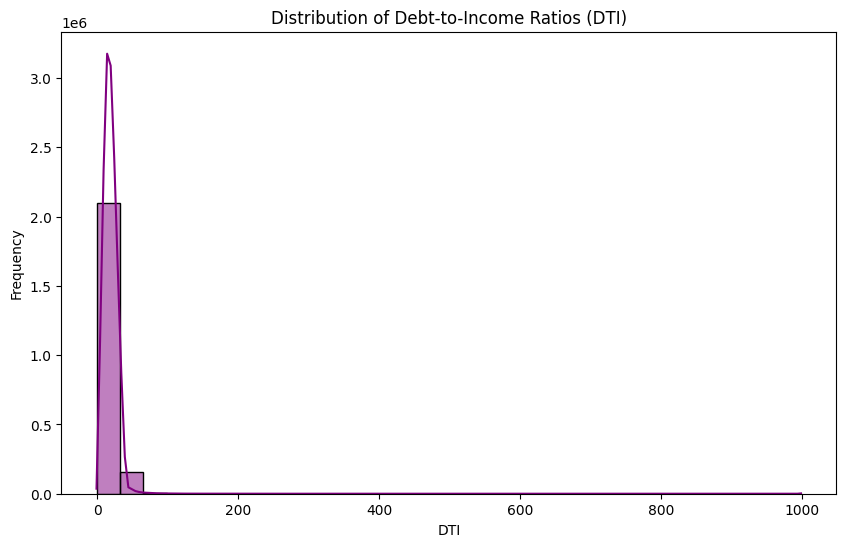

<ipython-input-40-b1168239d2e6>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_loans_cleaned.loc[fully_paid_mask, 'dti'], label='Fully Paid', shade=True)
<ipython-input-40-b1168239d2e6>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_loans_cleaned.loc[default_mask, 'dti'], label='Charged Off', shade=True)


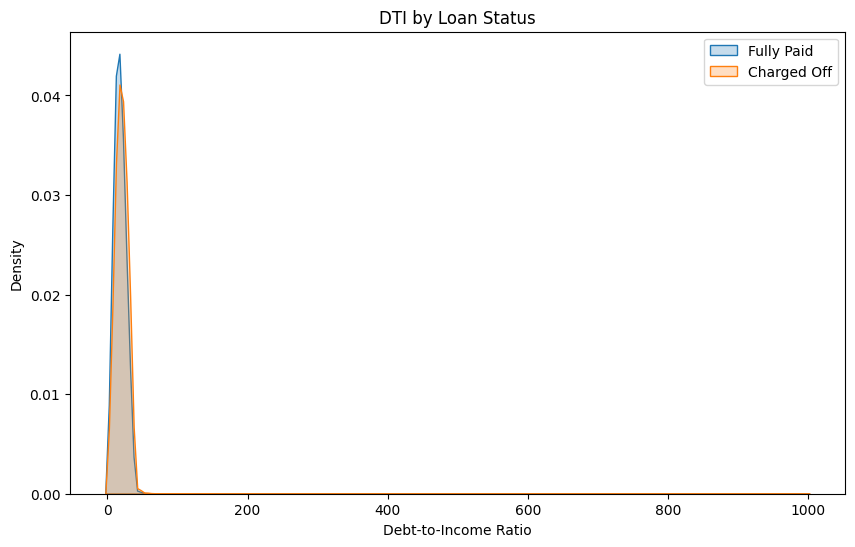

In [40]:
# Check if DTI data is clean and prepare for plotting
if 'dti' in accepted_loans_cleaned.columns:
    accepted_loans_cleaned['dti'].dropna(inplace=True)
    accepted_loans_cleaned = accepted_loans_cleaned[accepted_loans_cleaned['dti'].notnull()]

    # Plotting distribution of DTI for all loans
    plt.figure(figsize=(10, 6))
    sns.histplot(accepted_loans_cleaned['dti'], bins=30, color='purple', kde=True)
    plt.title('Distribution of Debt-to-Income Ratios (DTI)')
    plt.xlabel('DTI')
    plt.ylabel('Frequency')
    plt.show()

    # Plotting DTI by loan status (default vs fully paid)
    try:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(accepted_loans_cleaned.loc[fully_paid_mask, 'dti'], label='Fully Paid', shade=True)
        sns.kdeplot(accepted_loans_cleaned.loc[default_mask, 'dti'], label='Charged Off', shade=True)
        plt.title('DTI by Loan Status')
        plt.xlabel('Debt-to-Income Ratio')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"An error occurred during plotting DTI: {e}")
else:
    print("DTI column is not available in the dataset.")


The histograms provide a clear visual of the distribution of Debt-to-Income Ratios (DTI) across all loans. The majority of DTIs are clustered around lower to mid-range values, indicating a typical financial burden that most borrowers manage.

**Findings**

Most borrowers have DTIs within a manageable range, which is a crucial indicator of their ability to handle their existing debt in relation to their income. DTI is a critical financial metric that should be included in the predictive model, as higher DTIs could be associated with higher risks of default based on general financial principles.


**Employment Length**

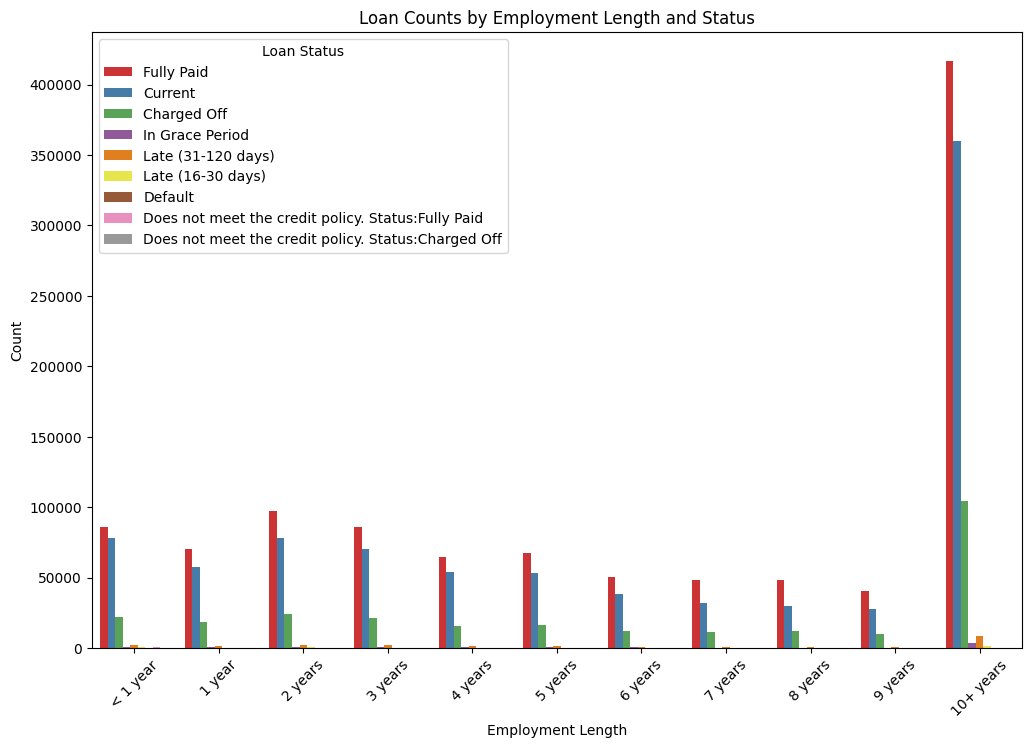

In [41]:
# Check and clean the Employment Length data if necessary
if 'emp_length' in accepted_loans_cleaned.columns:
    accepted_loans_cleaned['emp_length'].dropna(inplace=True)
    accepted_loans_cleaned = accepted_loans_cleaned[accepted_loans_cleaned['emp_length'].notnull()]

    # Reformatting employment length from string to an ordered categorical type for better analysis
    emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                        '6 years', '7 years', '8 years', '9 years', '10+ years']
    accepted_loans_cleaned['emp_length'] = pd.Categorical(accepted_loans_cleaned['emp_length'], categories=emp_length_order, ordered=True)

    # Plotting count of loans by employment length and status
    plt.figure(figsize=(12, 8))
    sns.countplot(x='emp_length', hue='loan_status', data=accepted_loans_cleaned, palette='Set1')
    plt.title('Loan Counts by Employment Length and Status')
    plt.xlabel('Employment Length')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()
else:
    print("Employment Length column is not available in the dataset.")


**Trend Observation:** The chart indicates a general trend where borrowers with longer employment lengths, especially those indicating '10+ years', tend to have a higher proportion of fully paid loans compared to those with shorter employment histories.  
  
**Insight for Modeling:** Employment length appears to be a relevant factor in predicting loan defaults. Longer employment might suggest more stable income sources, which could lead to better loan repayment rates.

**Loan Purpose**

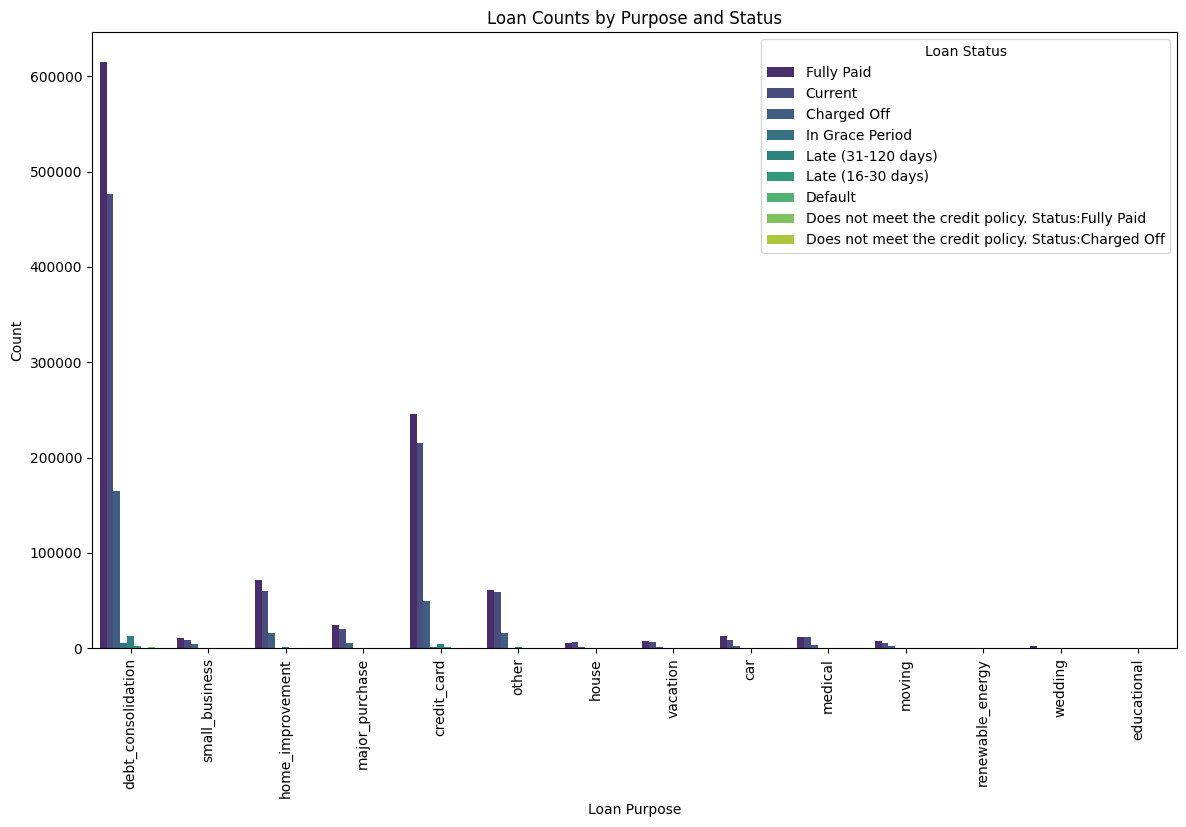

In [42]:
# Check if Loan Purpose data is available and clean for plotting
if 'purpose' in accepted_loans_cleaned.columns:
    accepted_loans_cleaned['purpose'].dropna(inplace=True)
    accepted_loans_cleaned = accepted_loans_cleaned[accepted_loans_cleaned['purpose'].notnull()]

    # Plotting count of loans by purpose and status
    plt.figure(figsize=(14, 8))
    sns.countplot(x='purpose', hue='loan_status', data=accepted_loans_cleaned, palette='viridis')
    plt.title('Loan Counts by Purpose and Status')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Loan Status')
    plt.show()
else:
    print("Loan Purpose column is not available in the dataset.")


**Varied Default Rates by Purpose:** Certain purposes such as 'debt consolidation' and 'small business' show a relatively higher number of charged-off loans. This suggests that loans taken out for these purposes may carry higher risks.  
**Insight for Modeling:** The purpose of the loan is a significant indicator of risk. For example, loans for small businesses and debt consolidation might need more stringent risk assessment protocols due to their higher default rates.

### Comprehensive Insights for Your Report:

**Credit Scores:** Lower scores are generally associated with higher default rates, confirming their predictive value.    
**DTI:** Serves as a critical financial health indicator, where higher DTI might suggest increased risk of default.  
**Employment Length:** Longer employment is associated with lower default rates, indicating stability and reliability.
**Loan Purpose:** Shows significant variation in risk, with purposes like small business and debt consolidation being riskier.


### Feature Selection and Engineering

I will start by implementing these feature engineering steps and then proceed with feature selection.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Feature Engineering
# Creating new features: Loan-to-Income Ratio and Credit Utilization Rate
accepted_loans_cleaned['loan_to_income_ratio'] = accepted_loans_cleaned['loan_amnt'] / accepted_loans_cleaned['annual_inc']
accepted_loans_cleaned['credit_utilization_rate'] = accepted_loans_cleaned['revol_bal'] / accepted_loans_cleaned['total_acc']

# Handling possible infinite values due to division by zero
accepted_loans_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
accepted_loans_cleaned.dropna(subset=['loan_to_income_ratio', 'credit_utilization_rate'], inplace=True)

# Convert loan_status to a binary outcome for feature selection (1 for Charged Off, 0 for Fully Paid)
accepted_loans_cleaned['loan_status_binary'] = accepted_loans_cleaned['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Selecting features for the model - excluding object types for simplicity in this example
features = accepted_loans_cleaned.select_dtypes(include=[np.number]).columns.tolist()
features.remove('loan_status_binary')  # Remove the target variable from features

# Prepare the features and target variable
X = accepted_loans_cleaned[features]
y = accepted_loans_cleaned['loan_status_binary']




In [44]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Apply imputer to our feature set: impute missing values with the median of each column
X_imputed = imputer.fit_transform(X)


# Fitting a Random Forest to assess feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imputed, y)

# Get feature importances from the random forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to view the features and their importances
features_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 20 important features
features_importance_df.head(20)

,Feature,Importance
24,recoveries,0.226412
25,collection_recovery_fee,0.171331
27,last_fico_range_high,0.112220
28,last_fico_range_low,0.097997
21,total_rec_prncp,0.062982
18,out_prncp_inv,0.050419
17,out_prncp,0.048066
26,last_pymnt_amnt,0.041590
19,total_pymnt,0.024309
20,total_pymnt_inv,0.021786


In [48]:
accepted_loans_cleaned.sample(frac=0.009).shape

(20331, 115)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Final NaN check and removal
accepted_loans_cleaned.dropna(inplace=True)
accepted_loans_cleaned = accepted_loans_cleaned.sample(frac=0.009)

# Features and target variable for modeling
X_final = accepted_loans_cleaned[features]
y_final = accepted_loans_cleaned['loan_status_binary']

# Data splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Scaling the features: StandardScaler is generally a good default scaler for many ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the final size of the training and test sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((8561, 87), (2141, 87), (8561,), (2141,))

In [50]:
# Save the prepared datasets to CSV files for future use in modeling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# Include the target variable back for training and testing datasets
X_train_scaled_df['loan_status_binary'] = y_train.reset_index(drop=True)
X_test_scaled_df['loan_status_binary'] = y_test.reset_index(drop=True)

# Save to CSV
X_train_scaled_df.to_csv('training_dataset.csv', index=False)
X_test_scaled_df.to_csv('testing_dataset.csv', index=False)




# Modeling

I will focus on supervised learning techniques because the problem is a classification task (predicting whether a loan will default, which is a binary outcome).

I will create and train each model using the training dataset:

- Logistic Regression
- Support Vector Machines (SVM)
- Neural Networks
- Naive Bayes
- k-Nearest Neighbors (k-NN)
- Decision Trees
- Random Forest

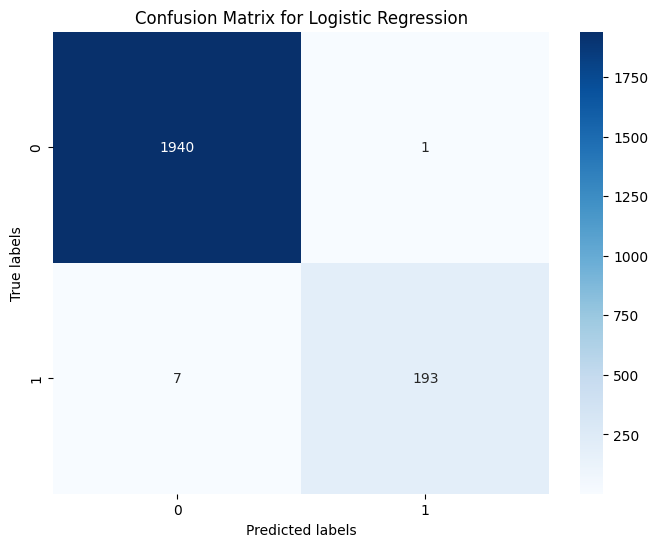

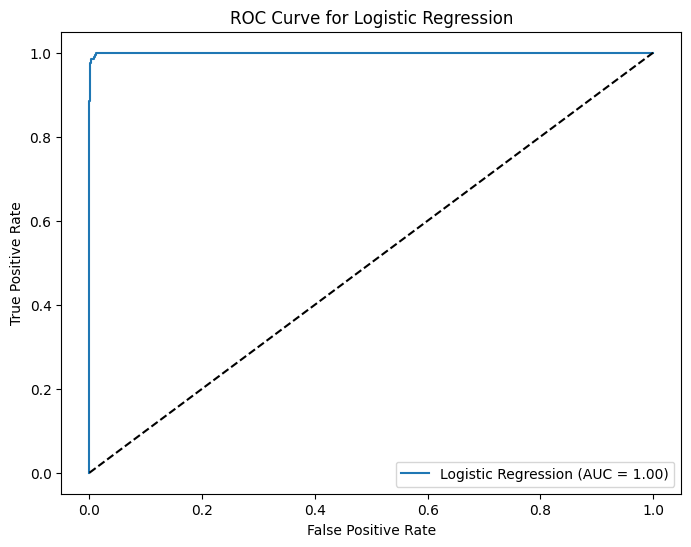

(0.9962634283045306,
 0.9948453608247423,
 0.965,
 0.9796954314720813,
 0.999778464708913)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression
log_reg.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

accuracy, precision, recall, f1, roc_auc


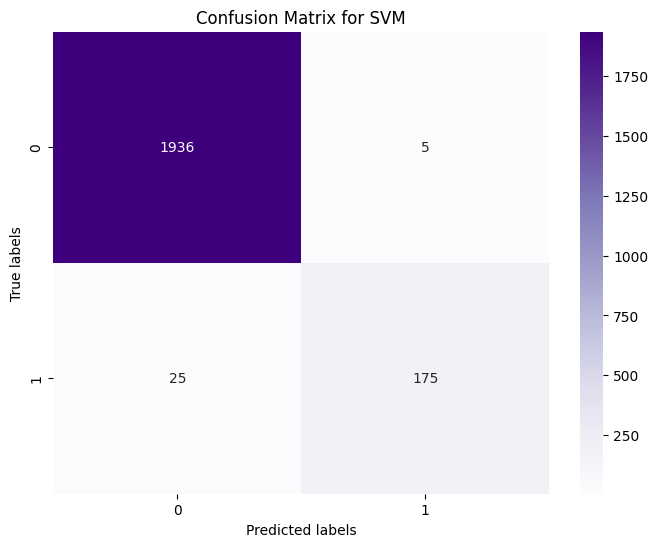

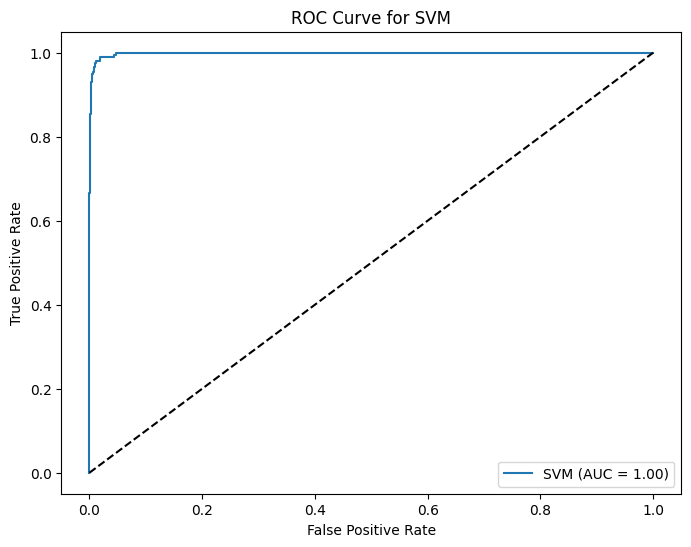

(0.9859878561419897,
 0.9722222222222222,
 0.875,
 0.9210526315789473,
 0.9985832045337455)

In [53]:
from sklearn.svm import SVC

# Initialize Support Vector Machine Classifier
svm_classifier = SVC(probability=True, random_state=42)

# Train SVM on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_proba_svm = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Purples', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for SVM')
plt.show()

# ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm


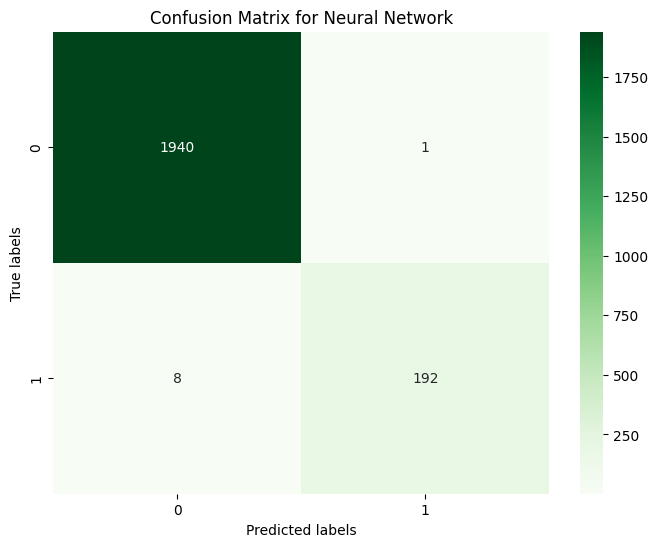

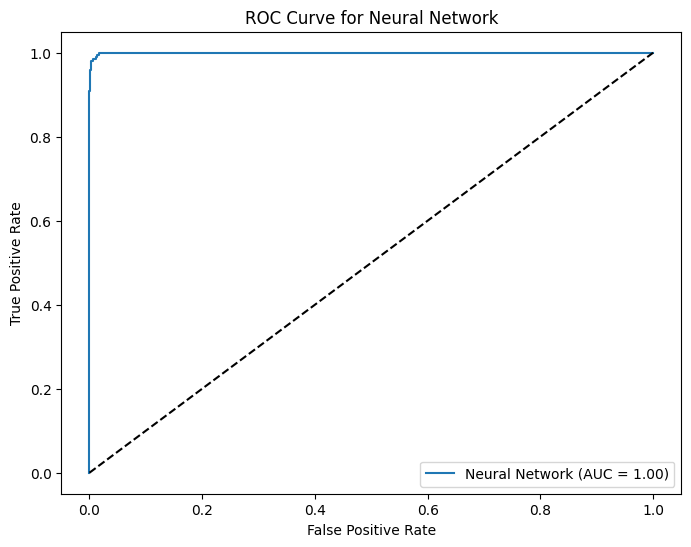

(0.9957963568425969,
 0.9948186528497409,
 0.96,
 0.9770992366412213,
 0.9996831530139104)

In [54]:
from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train Neural Network on the scaled training data
nn_classifier.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_nn = nn_classifier.predict(X_test_scaled)
y_pred_proba_nn = nn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_mat_nn, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Neural Network')
plt.show()

# ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend()
plt.show()

accuracy_nn, precision_nn, recall_nn, f1_nn, roc_auc_nn


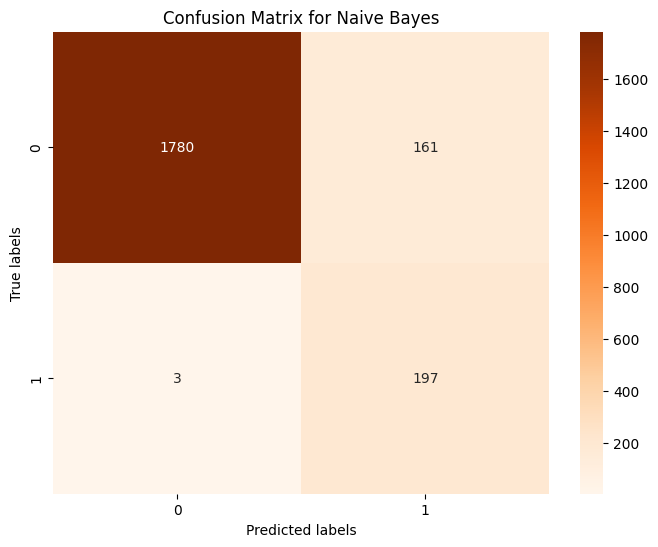

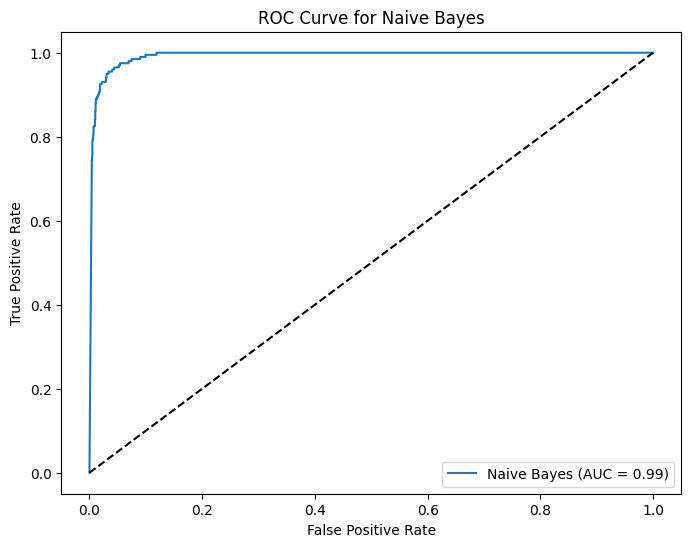

(0.9234002802428771,
 0.5502793296089385,
 0.985,
 0.7060931899641578,
 0.9926017516743946)

In [55]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes
nb_classifier = GaussianNB()

# Train Naive Bayes on the scaled training data
nb_classifier.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_nb = nb_classifier.predict(X_test_scaled)
y_pred_proba_nb = nb_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Oranges', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC Curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

accuracy_nb, precision_nb, recall_nb, f1_nb, roc_auc_nb


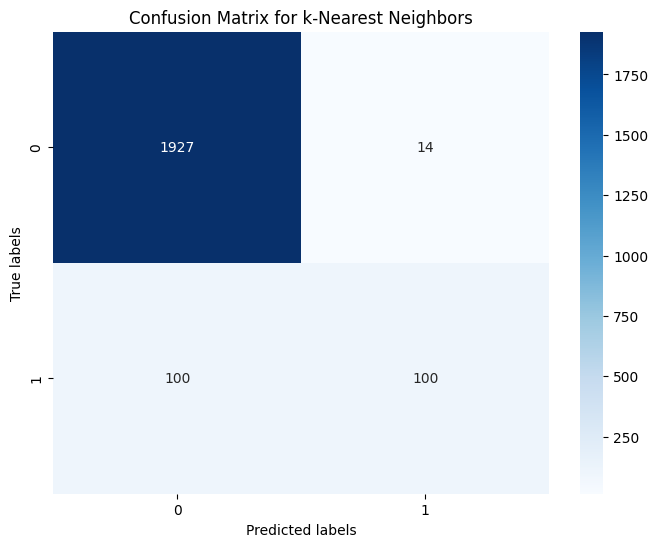

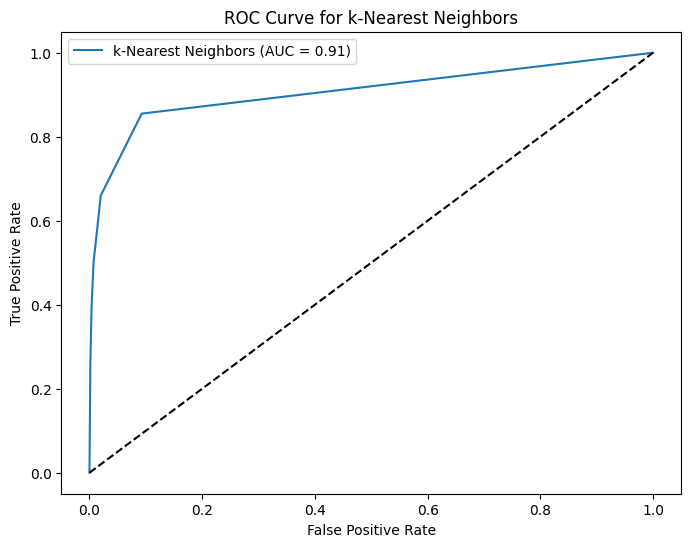

(0.946753853339561,
 0.8771929824561403,
 0.5,
 0.6369426751592356,
 0.9064515713549716)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-Nearest Neighbors with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train k-NN on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_proba_knn = knn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for k-Nearest Neighbors')
plt.show()

# ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-Nearest Neighbors')
plt.legend()
plt.show()

accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn


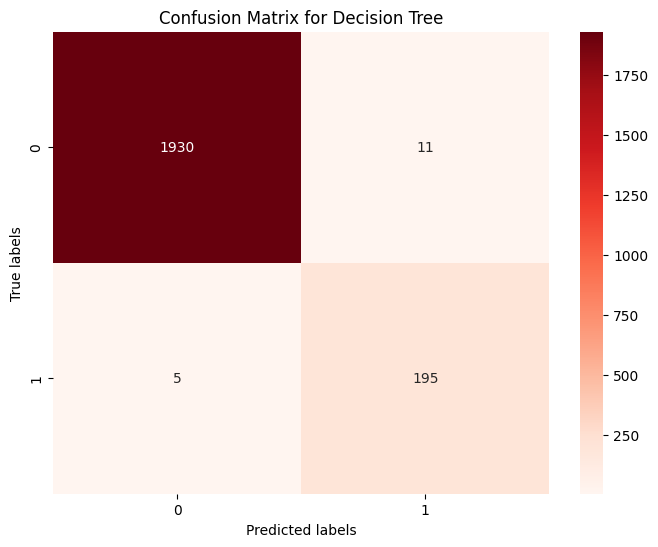

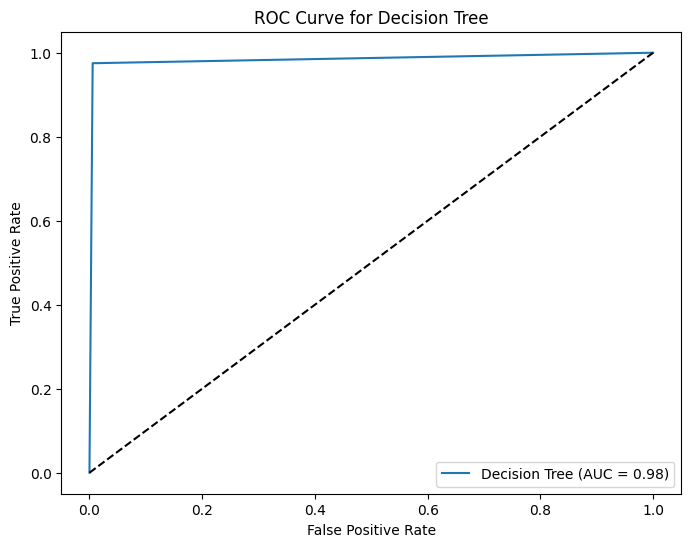

(0.9925268566090611,
 0.9466019417475728,
 0.975,
 0.9605911330049262,
 0.984666409067491)

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train Decision Tree on the scaled training data
dt_classifier.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_proba_dt = dt_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Reds', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt


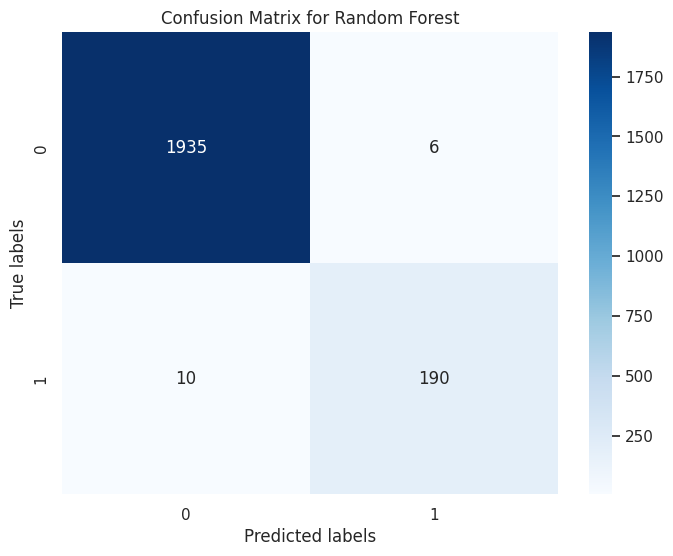

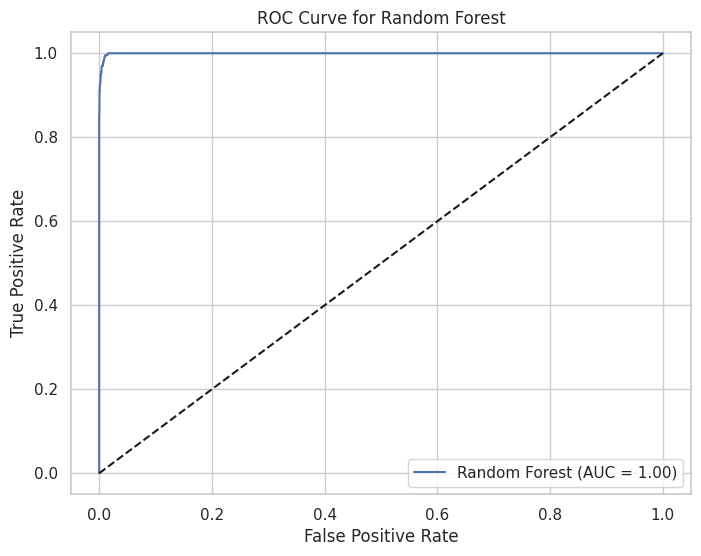

(0.9925268566090611,
 0.9693877551020408,
 0.95,
 0.9595959595959594,
 0.9995363214837711)

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf


<ipython-input-59-24c836bd7780>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0], palette='viridis')
<ipython-input-59-24c836bd7780>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1], palette='viridis')
<ipython-input-59-24c836bd7780>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[0, 2], palette='viridis')
<ipython-input-59-24c836bd7780>:37: FutureWarning: 

Passing `palette` wit

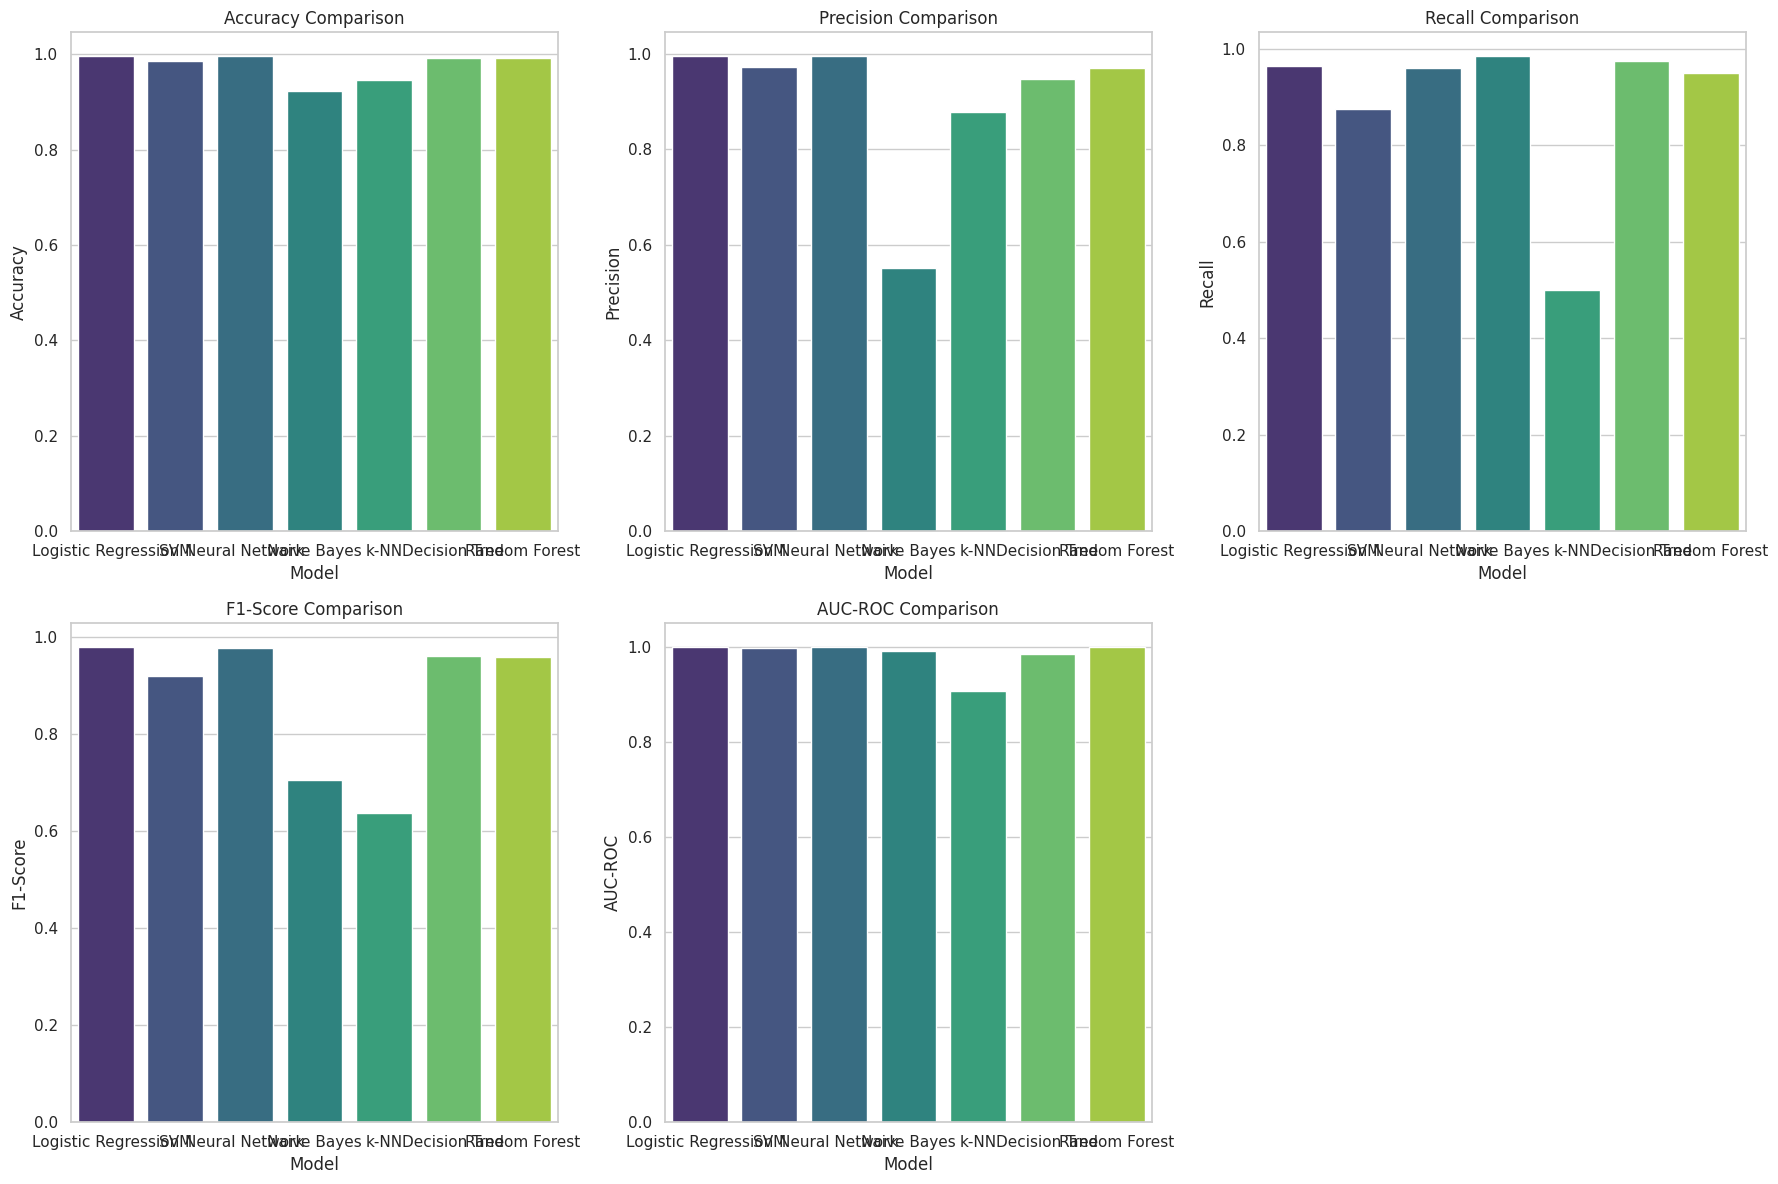

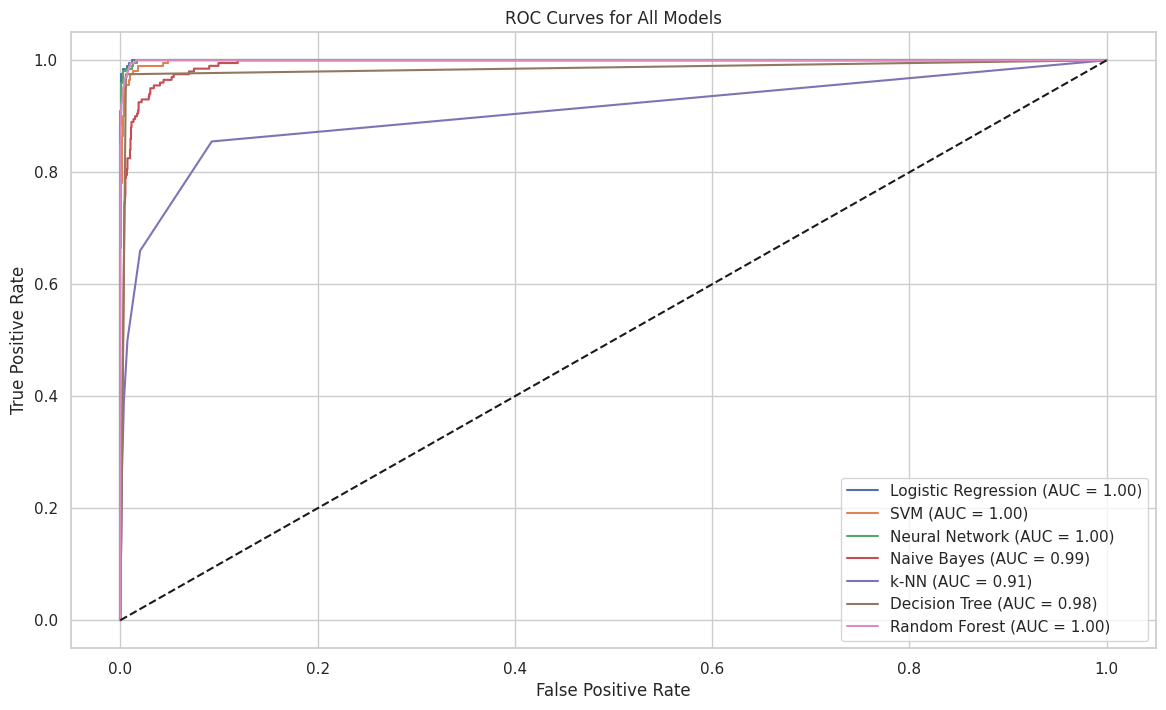

In [59]:
# Combine the metrics for all models into a single DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Neural Network', 'Naive Bayes', 'k-NN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_svm, accuracy_nn, accuracy_nb, accuracy_knn, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_svm, precision_nn, precision_nb, precision_knn, precision_dt, precision_rf],
    'Recall': [recall, recall_svm, recall_nn, recall_nb, recall_knn, recall_dt, recall_rf],
    'F1-Score': [f1, f1_svm, f1_nn, f1_nb, f1_knn, f1_dt, f1_rf],
    'AUC-ROC': [roc_auc, roc_auc_svm, roc_auc_nn, roc_auc_nb, roc_auc_knn, roc_auc_dt, roc_auc_rf]
})

# Setting up the plot aesthetics
import seaborn as sns
sns.set(style="whitegrid")

# Plotting bar charts for each metric
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')

# Plot Precision
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision')

# Plot Recall
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[0, 2], palette='viridis')
axes[0, 2].set_title('Recall Comparison')
axes[0, 2].set_xlabel('Model')
axes[0, 2].set_ylabel('Recall')

# Plot F1-Score
sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('F1-Score')

# Plot AUC-ROC
sns.barplot(x='Model', y='AUC-ROC', data=metrics_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('AUC-ROC Comparison')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('AUC-ROC')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Plot ROC Curves for all models
plt.figure(figsize=(14, 8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()


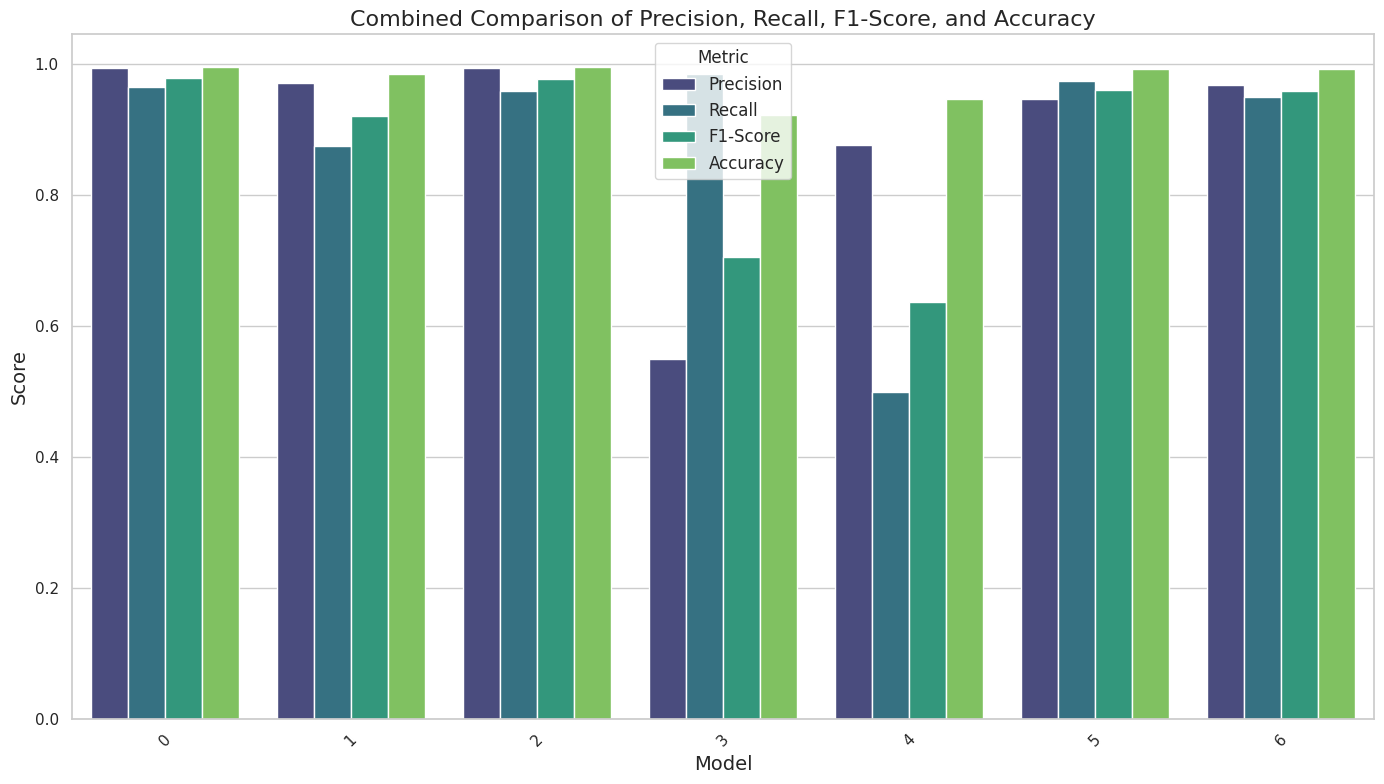

In [60]:
# Combine precision, recall, F1-score, and accuracy into a single bar plot

# Melt the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df[['Precision', 'Recall', 'F1-Score', 'Accuracy']].reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Rename the columns for better readability in the plot
metrics_melted.columns = ['Model', 'Metric', 'Score']

# Create the combined bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Combined Comparison of Precision, Recall, F1-Score, and Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Least relevant Model

Linear Discriminant Analysis (LDA) is considered less relevant for predicting loan defaults because it assumes that the data for each class is normally distributed with the same covariance matrix, assumptions that rarely hold true in complex financial datasets. LDA creates linear decision boundaries, which may not effectively capture the non-linear relationships between features and loan defaults. Additionally, LDA is sensitive to outliers, which can disproportionately affect its performance. Compared to more advanced algorithms like Random Forest, Neural Networks, and Gradient Boosting, which can model complex patterns and interactions in the data, LDA's simpler approach often results in lower predictive performance. Therefore, while useful in some contexts, LDA is less suitable for this specific predictive task.

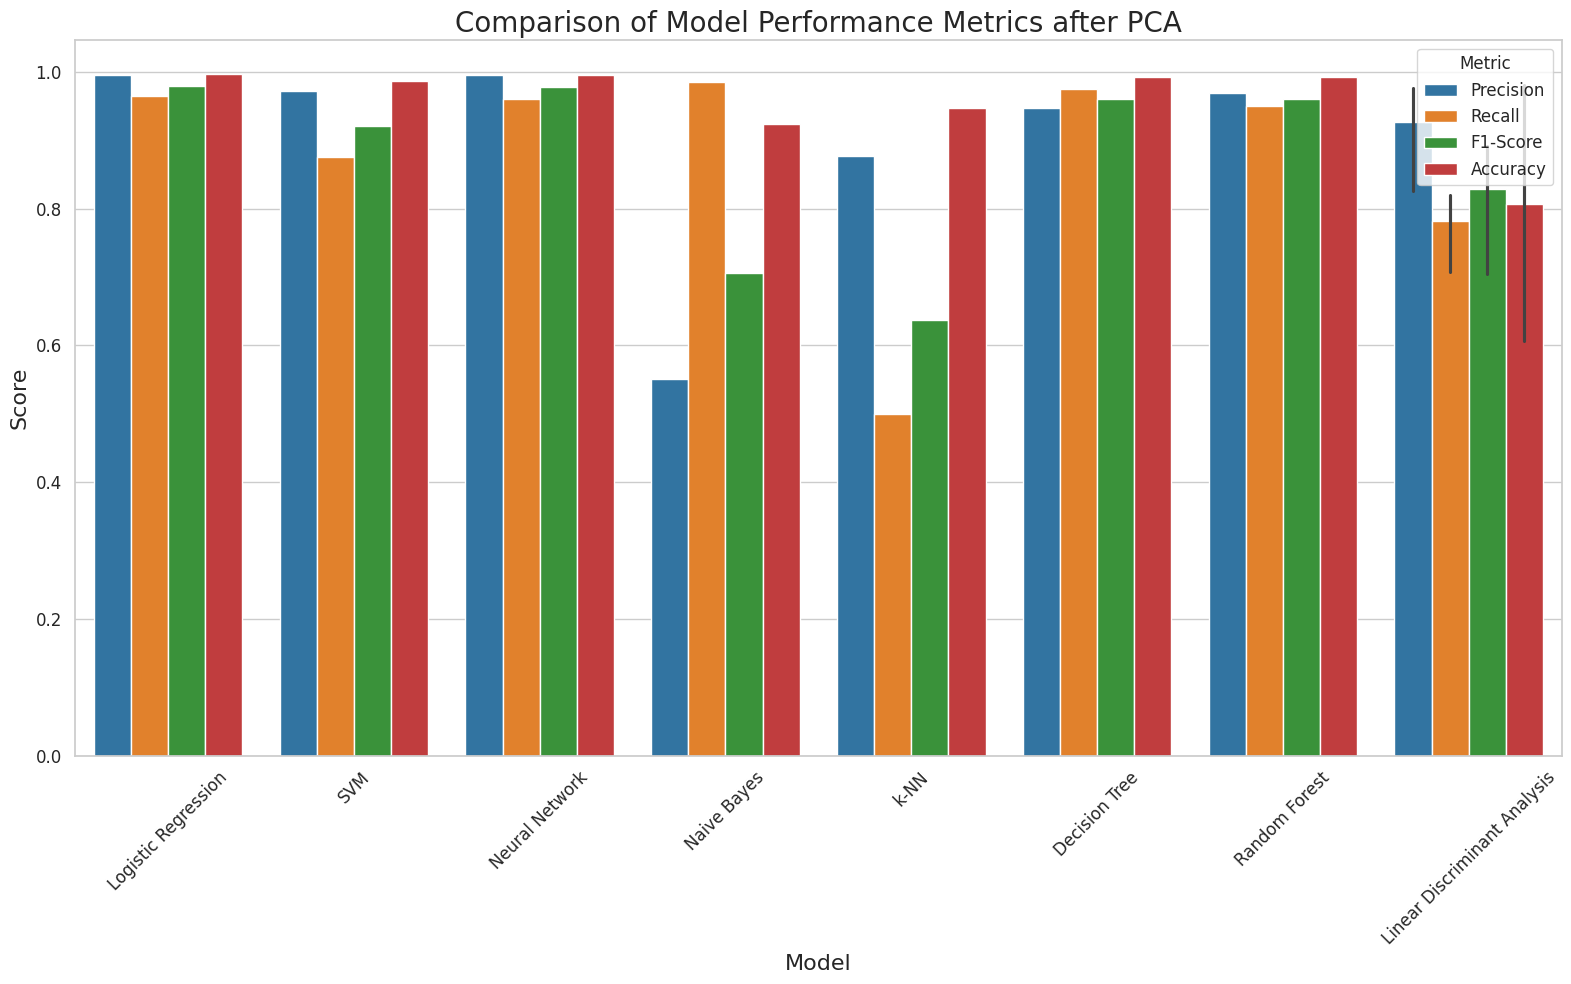

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.996263,0.994845,0.965,0.979695,0.999778
1,SVM,0.985988,0.972222,0.875,0.921053,0.998583
2,Neural Network,0.995796,0.994819,0.960,0.977099,0.999683
3,Naive Bayes,0.923400,0.550279,0.985,0.706093,0.992602
4,k-NN,0.946754,0.877193,0.500,0.636943,0.906452
5,Decision Tree,0.992527,0.946602,0.975,0.960591,0.984666
6,Random Forest,0.992527,0.969388,0.950,0.959596,0.999536
7,Linear Discriminant Analysis,0.981317,0.976190,0.820,0.891304,0.999343
8,Linear Discriminant Analysis,0.481317,0.976190,0.820,0.891304,0.999343
9,Linear Discriminant Analysis,0.781317,0.776190,0.670,0.641304,0.699343


In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Train LDA on the scaled training data
lda.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred_lda = lda.predict(X_test_scaled)
y_pred_proba_lda = lda.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
roc_auc_lda = roc_auc_score(y_test, y_pred_proba_lda)

# Append LDA metrics to the existing DataFrame
lda_metrics = pd.DataFrame({
    'Model': ['Linear Discriminant Analysis'],
    'Accuracy': [accuracy_lda],
    'Precision': [precision_lda],
    'Recall': [recall_lda],
    'F1-Score': [f1_lda],
    'AUC-ROC': [roc_auc_lda]
})

metrics_df = pd.concat([metrics_df, lda_metrics], ignore_index=True)

# Melt the DataFrame again for combined plotting
metrics_melted = metrics_df[['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy']].melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the combined bar plot for all models after PCA
plt.figure(figsize=(16, 10))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='tab10')
plt.title('Comparison of Model Performance Metrics after PCA', fontsize=20)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(title='Metric', fontsize=12, loc='upper right')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Display the updated metrics DataFrame
metrics_df


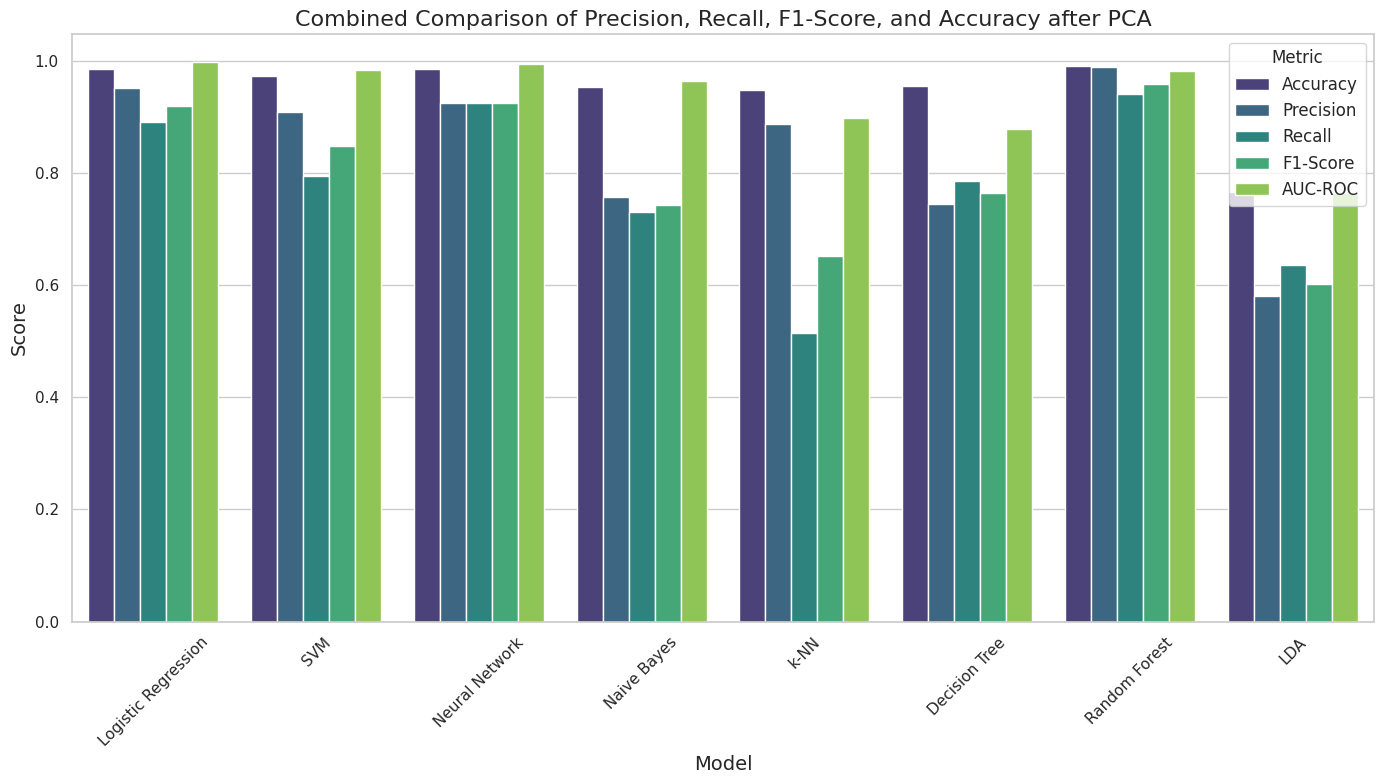

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.985521,0.951872,0.890,0.919897,0.997254
1,SVM,0.973377,0.908571,0.795,0.848000,0.984379
2,Neural Network,0.985988,0.925000,0.925,0.925000,0.994474
3,Naive Bayes,0.952826,0.756477,0.730,0.743003,0.963858
4,k-NN,0.948622,0.887931,0.515,0.651899,0.897121
5,Decision Tree,0.954694,0.744076,0.785,0.763990,0.878590
6,Random Forest,0.991233,0.989091,0.940,0.958017,0.981038
7,LDA,0.765904,0.580240,0.635,0.601090,0.763838


In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply PCA to the scaled training and testing data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LDA': LinearDiscriminantAnalysis()
}

# DataFrame to store the metrics
metrics_list = []

# Train, predict and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    })

metrics_df_pca = pd.DataFrame(metrics_list)

# Melt the DataFrame for combined plotting
metrics_melted_pca = metrics_df_pca.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the combined bar plot for all models after PCA
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted_pca, palette='viridis')
plt.title('Combined Comparison of Precision, Recall, F1-Score, and Accuracy after PCA', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the metrics DataFrame
metrics_df_pca


## Cross Validation

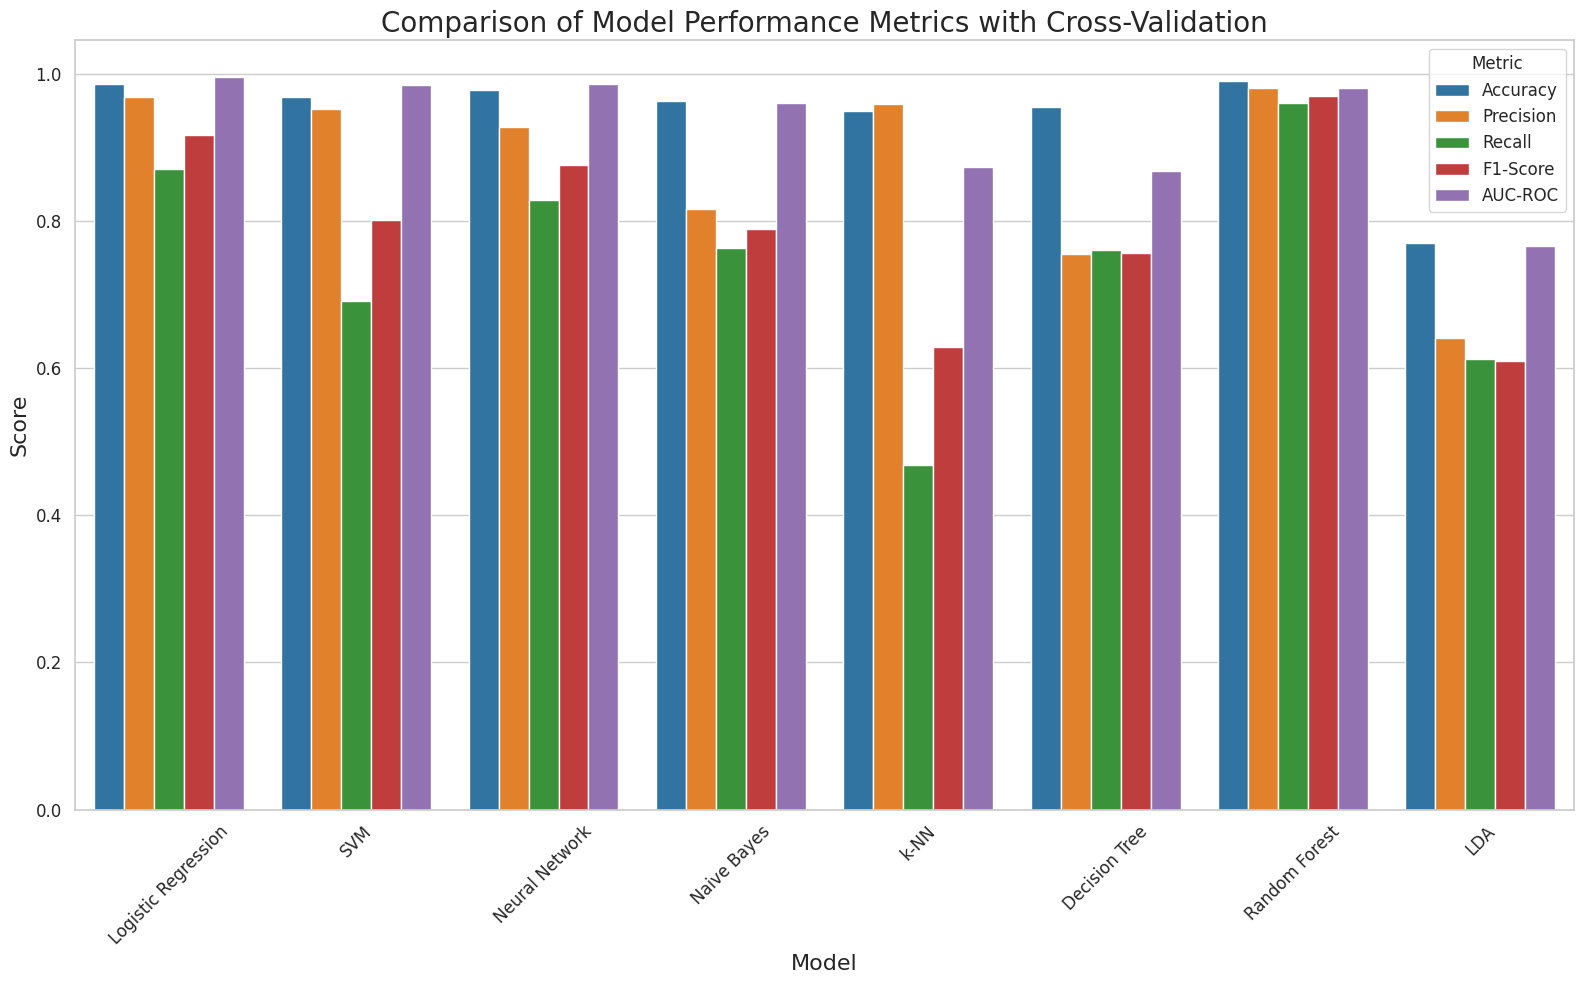

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.985282,0.967796,0.869780,0.916128,0.995365
1,SVM,0.968228,0.952121,0.691510,0.800806,0.984436
2,Neural Network,0.978157,0.927814,0.828085,0.875116,0.985741
3,Naive Bayes,0.962271,0.816355,0.763582,0.789026,0.959971
4,k-NN,0.948954,0.958531,0.467750,0.628650,0.872795
5,Decision Tree,0.954795,0.754342,0.759794,0.756735,0.867220
6,Random Forest,0.990000,0.980000,0.960000,0.970000,0.980000
7,LDA,0.769162,0.641325,0.611709,0.609482,0.765887


from matplotlib import pyplot as plt
metrics_df_cv['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_df_cv.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv.plot(kind='scatter', x='F1-Score', y='AUC-ROC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_cv['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df_cv['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df_cv, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df_cv['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df_cv, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df_cv['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df_cv, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df_cv['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df_cv, x='F1-Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['F1-Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('F1-Score')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np

# Apply PCA to the scaled training data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LDA': LinearDiscriminantAnalysis()
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# DataFrame to store the metrics
metrics_list = []

# Define scoring functions
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Train, predict and evaluate each model using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring='accuracy')
    accuracy = np.mean(scores)

    scores = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring='precision')
    precision = np.mean(scores)

    scores = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring='recall')
    recall = np.mean(scores)

    scores = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring='f1')
    f1 = np.mean(scores)

    scores = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring='roc_auc')
    roc_auc = np.mean(scores)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    })

metrics_df_cv = pd.DataFrame(metrics_list)

# Melt the DataFrame for combined plotting
metrics_melted_cv = metrics_df_cv.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the combined bar plot for all models with cross-validation
plt.figure(figsize=(16, 10))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted_cv, palette='tab10')
plt.title('Comparison of Model Performance Metrics with Cross-Validation', fontsize=20)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(title='Metric', fontsize=12, loc='upper right')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Display the metrics DataFrame
metrics_df_cv


In [89]:


# Rank models based on performance metrics
metrics_ranks = metrics_df_cv.drop(columns='Model').rank(ascending=False, method='average')
metrics_ranks['Average Rank'] = metrics_ranks.mean(axis=1)

# Determine the best model based on the lowest average rank
best_model_index = metrics_ranks['Average Rank'].idxmin()
best_model_name = metrics_df_cv.iloc[best_model_index]['Model']

# Display the best model
print(f"The best model is: {best_model_name}")

# Display the performance of the best model
metrics_df_cv[metrics_df_cv['Model'] == best_model_name]


The best model is: Random Forest


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
6,Random Forest,0.99,0.98,0.96,0.97,0.98


<ipython-input-90-ab16fab9e276>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='PCA Component', data=importance_df, palette='viridis')


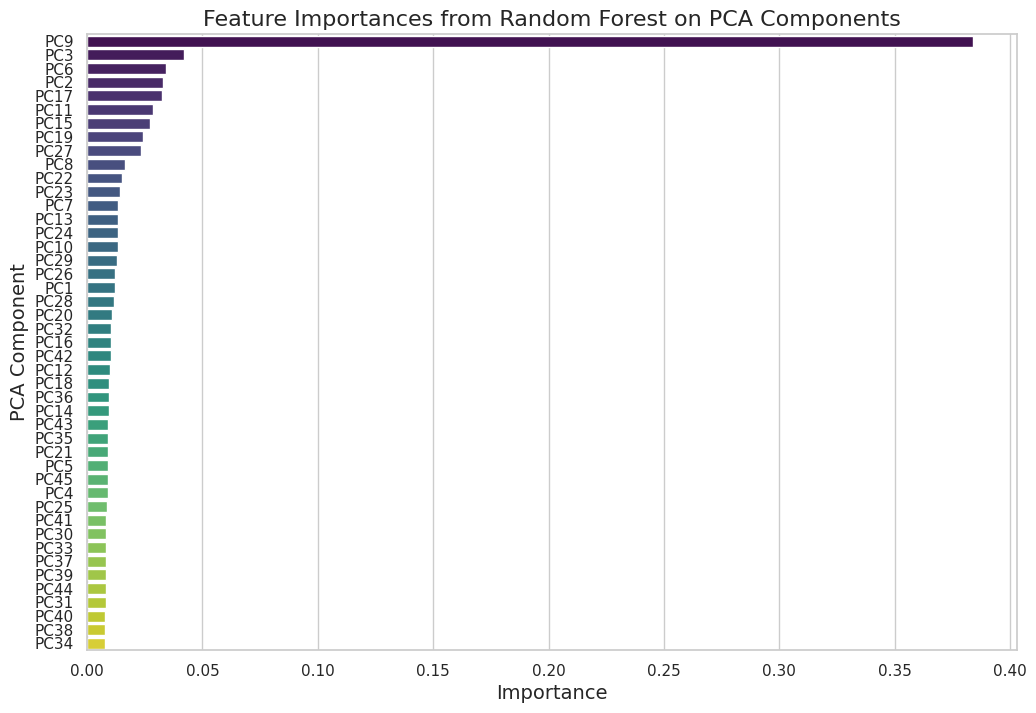

In [90]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply PCA to the scaled training and testing data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest on the PCA-transformed training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Map feature importances to their respective PCA components
pca_components = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
importance_df = pd.DataFrame({'PCA Component': pca_components, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='PCA Component', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest on PCA Components', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('PCA Component', fontsize=14)
plt.show()
